In [7]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:' , python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [8]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [9]:
# Imports

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Versões dos pacotes usados
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.4.2
matplotlib: 3.5.1



In [11]:
## CARREGANDO OS DADOS

In [15]:
dadosRH = pd.read_csv('dadosRH.csv')

In [16]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [17]:
dadosRH.shape

(54808, 11)

In [18]:
## Análise Exploratória, Limpeza e Transformação de dados

# Vamos manipular dados e corrigir eventuais problemas

In [19]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [20]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

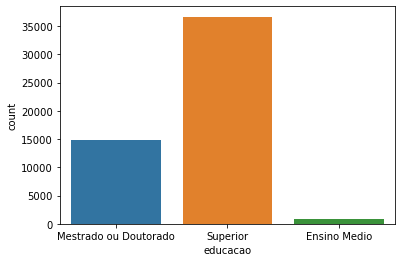

In [22]:
sns.countplot(dadosRH['educacao'])

In [23]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

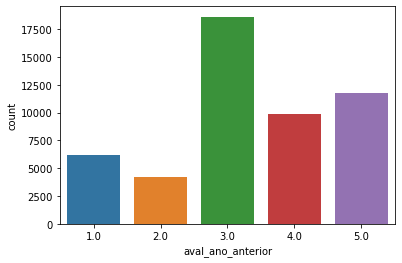

In [24]:
sns.countplot(dadosRH['aval_ano_anterior'])

In [ ]:
# Vamos implicar imputação e preencher os valores ausentes

In [26]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [29]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace=True)

In [30]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [32]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [33]:
dadosRH.shape

(54808, 11)

In [35]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


In [ ]:
# vamos verificar o balanceamento de classe da variável "promovido"

In [36]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

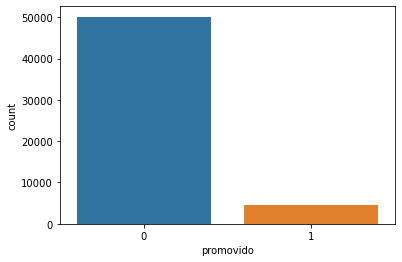

In [38]:
sns.countplot(dadosRH['promovido'])

In [41]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [42]:
df_classe_majoritaria.shape

(50140, 11)

In [43]:
df_classe_minoritaria.shape

(4668, 11)

In [46]:
# Upsample da classe minoritária

from sklearn.utils import resample

df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, replace= True, n_samples = 50140 , random_state = 150)

In [47]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria , df_classe_minoritaria_upsampled ])

In [48]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [49]:
dadosRH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  int64  
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             54808 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    54808 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

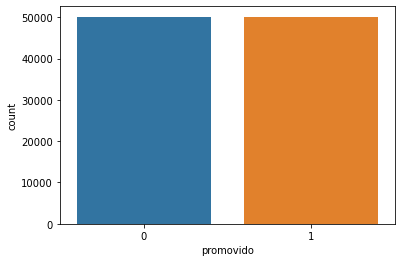

In [50]:
sns.countplot(dadosRH_balanceados['promovido'])

<AxesSubplot:xlabel='promovido', ylabel='count'>

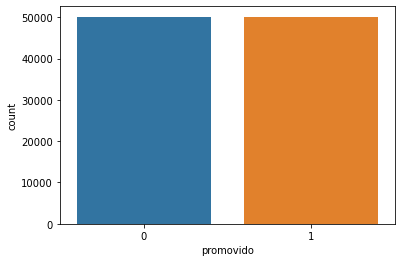

In [52]:
sns.countplot(data = dadosRH_balanceados , x = 'promovido') # nova versão do seaborn

In [53]:
# Os dados estão balanceados. Vamos salvar o dataset com os dados manipulados

In [54]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding= 'utf-8' , index = False)

# Agora carregamos os dados e seguimos com o trabalho de análise 
# A partir daqui seguiremos para o power BI


In [55]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [56]:
# Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

### Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

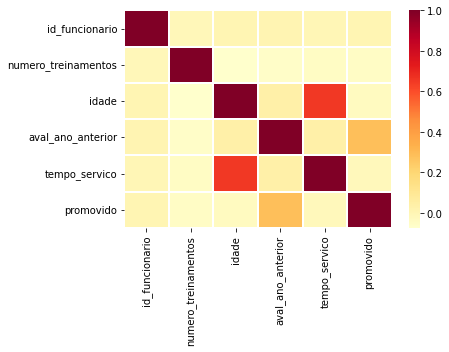

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd" , linewidth = 0.1)
plt.show()

### Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

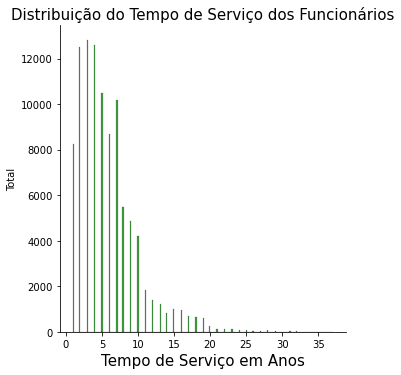

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários' , fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos' , fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

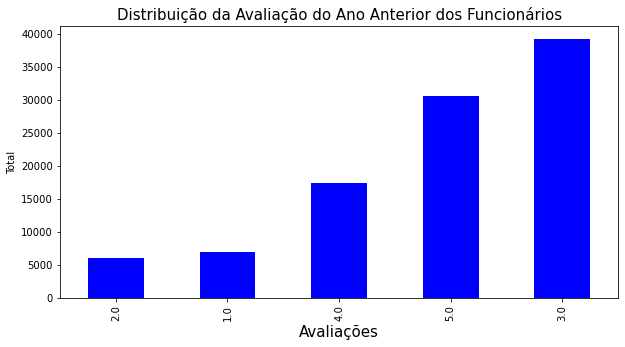

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue' , figsize = (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários' ,fontsize =15)
plt.xlabel('Avaliações' , fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\jeand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


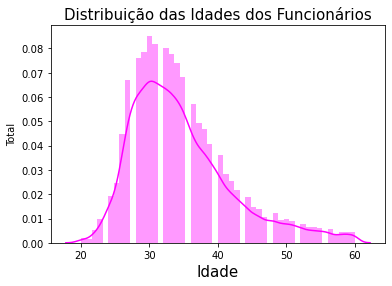

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta') #displot também é utilizavel
plt.title('Distribuição das Idades dos Funcionários' , fontsize = 15)
plt.xlabel('Idade' , fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


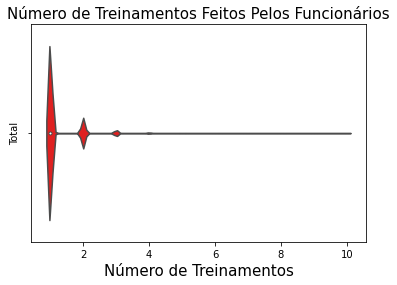

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(dataset['numero_treinamentos'], color = 'red') # Usar nova documentação
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [70]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

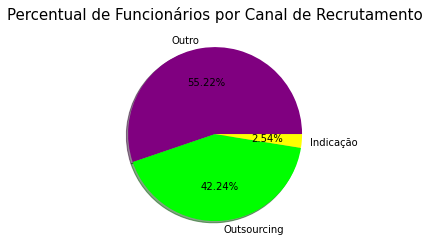

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375 , 42358 , 2547] # Valores encontrados na celula acima
labels = "Outro" , "Outsourcing" , "Indicação"
colors = ['purple' , 'lime' , 'yellow']
explode = [ 0, 0, 0]
plt.pie(fatias, labels= labels , colors = colors , explode = explode , shadow = True , autopct= "%.2f%%")
plt.title('Percentual de Funcionários por Canal de Recrutamento' , fontsize=15)
plt.axis('off')
#plt.legend()
plt.show()

### Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?


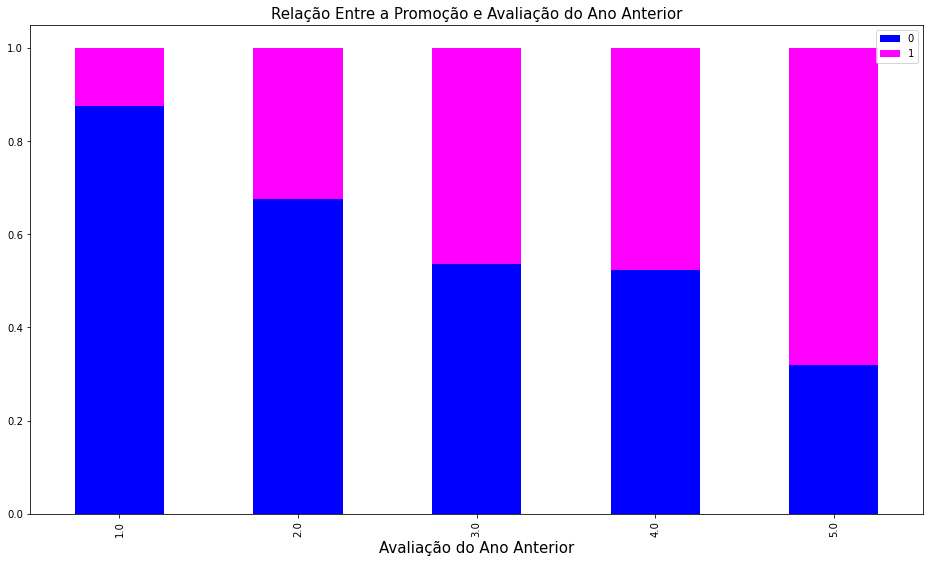

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'] , dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar' , stacked = True, figsize = (16,9) ,color = ['blue', 'magenta'])
plt.title('Relação Entre a Promoção e Avaliação do Ano Anterior', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior' ,fontsize =15)
plt.legend()
plt.show()

### FIM